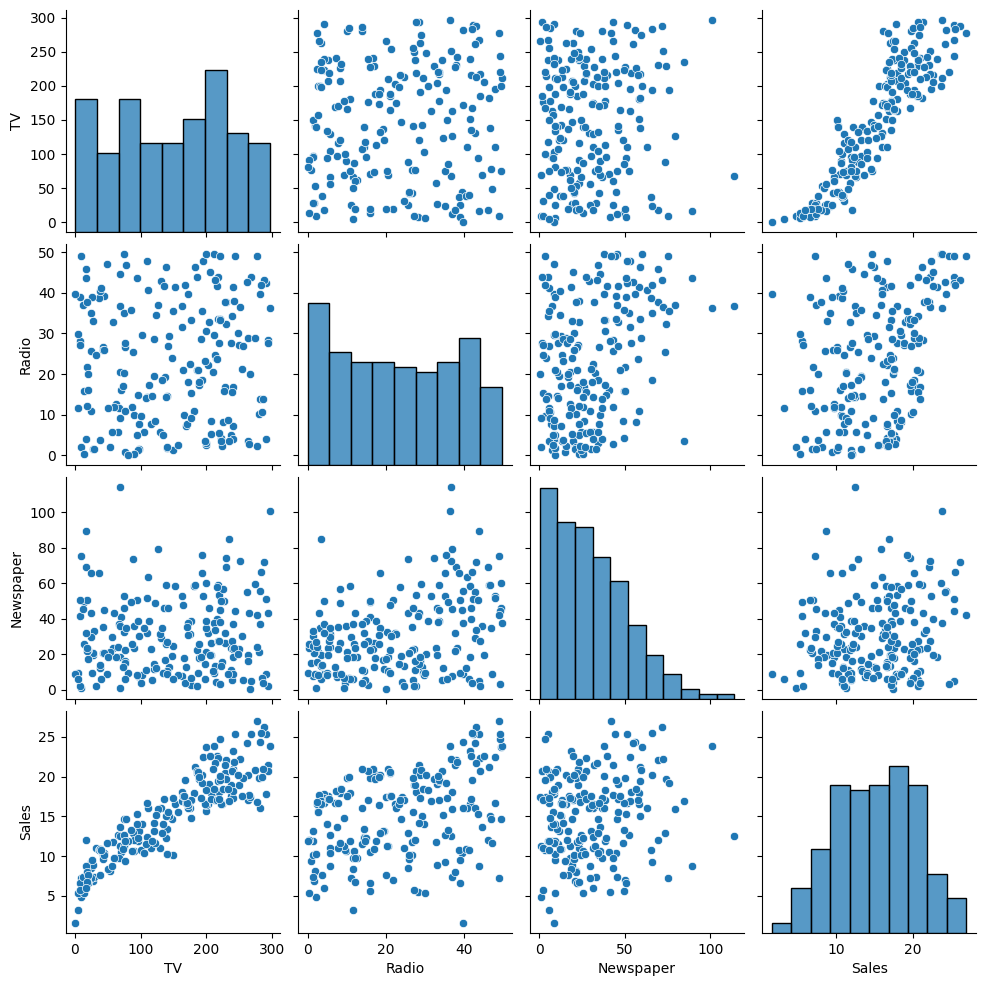

MAE: 0.9179999999999993
RMSE: 1.1989298770153327
R-squared: 0.9534827934927883


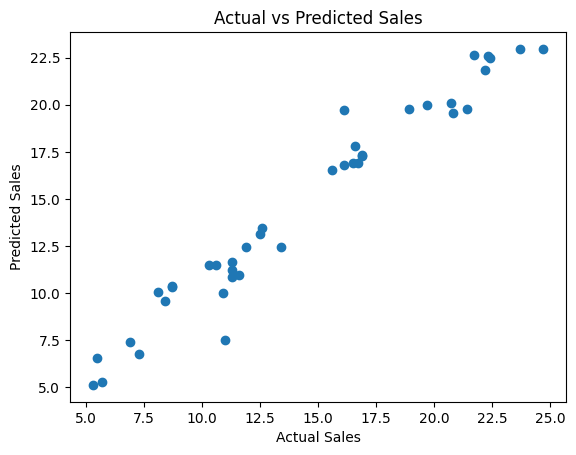

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

data = data.dropna()

# Exploratory Data Analysis (EDA)
sns.pairplot(data)
plt.show()


# the target variable is 'Sales' and features include 'TV', 'Radio', 'Newspaper'.
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']  # Dependent variable (target)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 trees
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

#Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Step 9: Visualization of Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


Feature: TV, Score: 0.8453549496264559
Feature: Radio, Score: 0.13664184101428475
Feature: Newspaper, Score: 0.01800320935925943


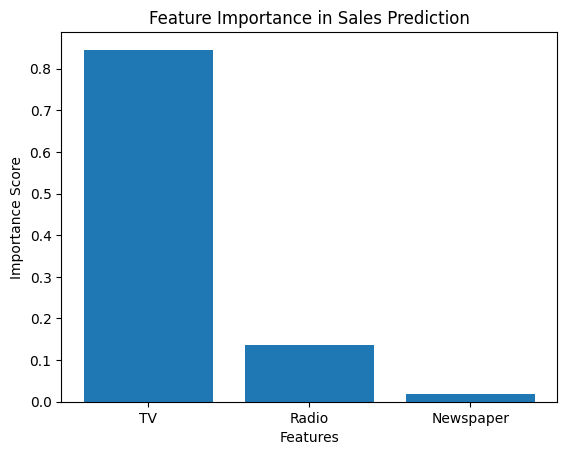

In [2]:
# Feature importance
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

# Plotting feature importance
plt.bar(X.columns, importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Sales Prediction')
plt.show()
